# Image filtering

In [2]:
from PIL import Image
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

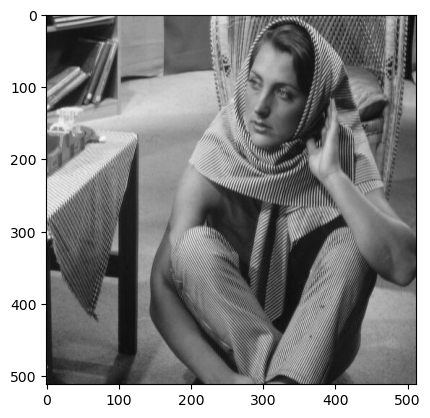

In [4]:
# Read image
img = Image.open('../H1/barbara.jpg')

img_array = np.asanyarray(img)[:,:,0]
plt.imshow(img_array, cmap='gray')

# Gradient Filter (Prewitt)


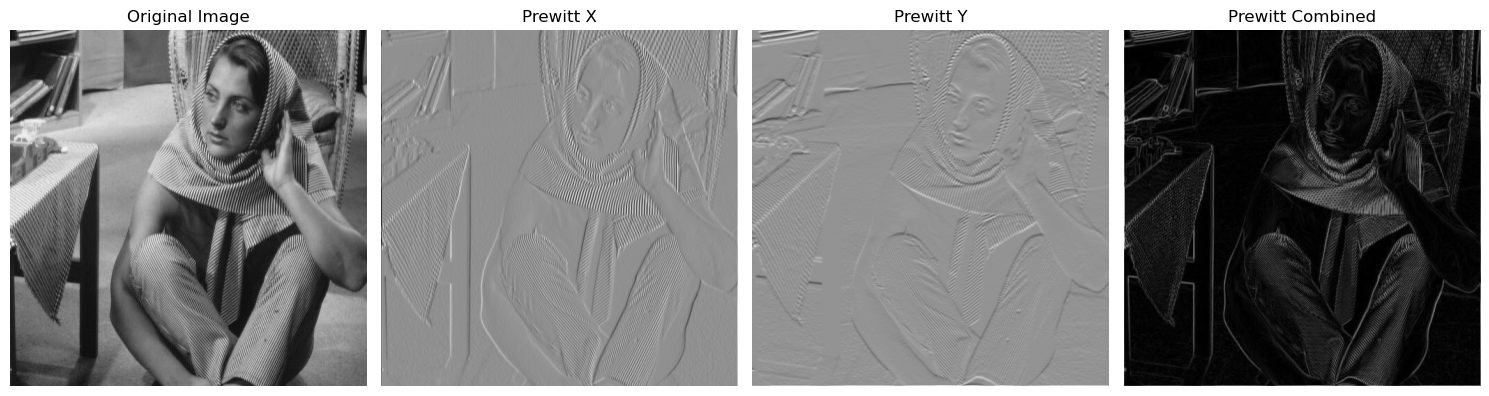

In [5]:
# Gradient Filter (Prewitt)


kernel_x = np.array([[-1, 0, 1], [-1,0,1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [ 0,  0,  0], [ 1,  1,  1]])

prewitt_x = convolve2d(img_array, kernel_x, mode='same')
prewitt_y = convolve2d(img_array, kernel_y, mode='same')

prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)

# displaying images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Prewitt X')
plt.imshow(prewitt_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Prewitt Y')
plt.imshow(prewitt_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Prewitt Combined')
plt.imshow(prewitt, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()






# Sobel filter

(-0.5, 511.5, 511.5, -0.5)

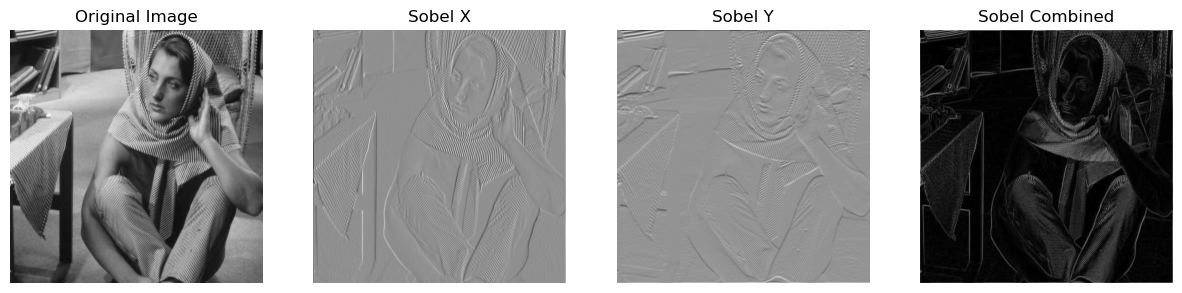

In [6]:
from scipy.signal import convolve2d


kernel_x = np.array([[-1, 0, 1], [-2,0,2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [ 0,  0,  0], [ 1,  2,  1]])

sobel_x = convolve2d(img_array, kernel_x, mode='same')
sobel_y = convolve2d(img_array, kernel_y, mode='same')

sobel = np.sqrt(sobel_x**2 + sobel_y**2)

# displaying images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')


plt.subplot(1, 4, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Sobel Combined')
plt.imshow(sobel, cmap='gray')
plt.axis('off')


# Average filter


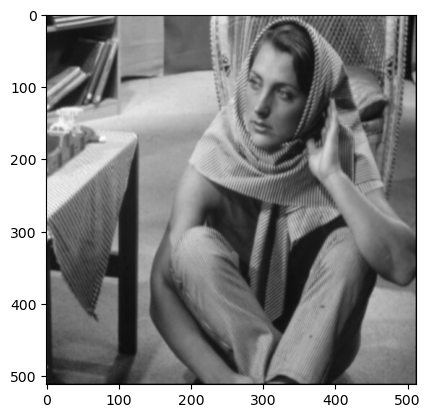

In [5]:
# Kernel for the average filter
kernel = np.ones((3, 3)) / 9
new_img = convolve2d(img_array, kernel, mode='same')
plt.imshow(new_img, cmap='gray')

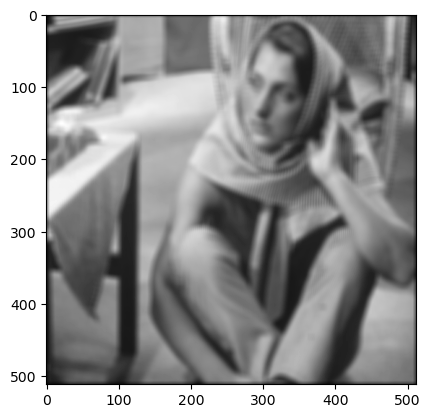

In [6]:
def generate_gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / kernel.sum()  

# Defining the parameters for the Gaussian kernel
size = 10
sigma = 10.0

# Generating the Gaussian kernel
gaussian_kernel = generate_gaussian_kernel(size, sigma)

# Applying the filter
new_img = convolve2d(img_array, gaussian_kernel, mode='same')

plt.imshow(new_img, cmap='gray')
